In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [161]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Charter"
plt.rcParams["text.usetex"] = False
plt.rcParams["text.latex.preamble"] = (
    r"\usepackage[bitstream-charter]{mathdesign} \usepackage{amsmath} \usepackage{siunitx}"
)

FONTSIZE = 20
FONTSIZE_LEGEND = FONTSIZE
FONTSIZE_TICK = FONTSIZE
TICKLABELSIZE = 10

colors = ["black", "#0343DE", "#A52A2A", "darkorange"]

In [162]:
distributions = ["GammaMixture", "GaussianMixture", "Categorical"]
n_components = [1, 2, 3, 4, 5, 8]
n_iterations = [100000]
lr = [1e-3, 3e-4]
diff = [True, False]
run = [1, 2, 3]

In [163]:
results = [
    {"distribution": "GammaMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7689},
    {"distribution": "GammaMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7682},
    {"distribution": "GammaMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7752},
    {"distribution": "GaussianMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7815},
    {"distribution": "GaussianMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7836},
    {"distribution": "GaussianMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7828},
    {"distribution": "GaussianMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 1, "loss": 2.7760},
    {"distribution": "GaussianMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 2, "loss": 2.7760},
    {"distribution": "GaussianMixture", "n_components": 1, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 3, "loss": 2.7783},
    {"distribution": "GammaMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7297},
    {"distribution": "GammaMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7355},
    {"distribution": "GammaMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7394},
    {"distribution": "GaussianMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7371},
    {"distribution": "GaussianMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7415},
    {"distribution": "GaussianMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7513},
    {"distribution": "GaussianMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 1, "loss": 2.7324},
    {"distribution": "GaussianMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 2, "loss": 2.7334},
    {"distribution": "GaussianMixture", "n_components": 2, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 3, "loss": 2.7315},
    {"distribution": "GammaMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7256},
    {"distribution": "GammaMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7330},
    {"distribution": "GammaMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7287},
    {"distribution": "GaussianMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7284},
    {"distribution": "GaussianMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7290},
    {"distribution": "GaussianMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7307},
    {"distribution": "GaussianMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 1, "loss": 2.7197},
    {"distribution": "GaussianMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 2, "loss": 2.7200},
    {"distribution": "GaussianMixture", "n_components": 3, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 3, "loss": 2.7203},
    {"distribution": "GammaMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7230},
    {"distribution": "GammaMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7279},
    {"distribution": "GammaMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7331},
    {"distribution": "GaussianMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7240},
    {"distribution": "GaussianMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7277},
    #{"distribution": "GaussianMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7709},
    {"distribution": "GaussianMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7256},
    {"distribution": "GaussianMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 1, "loss": 2.7177},
    {"distribution": "GaussianMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 2, "loss": 2.7180},
    {"distribution": "GaussianMixture", "n_components": 4, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 3, "loss": 2.7188},
    {"distribution": "GammaMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7275},
    {"distribution": "GammaMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7252},
    {"distribution": "GammaMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7319},
    {"distribution": "GaussianMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7266},
    {"distribution": "GaussianMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7259},
    {"distribution": "GaussianMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7451},
    {"distribution": "GaussianMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 1, "loss": 2.7171},
    {"distribution": "GaussianMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 2, "loss": 2.7180},
    {"distribution": "GaussianMixture", "n_components": 5, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 3, "loss": 2.7183},
    {"distribution": "GammaMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7259},
    {"distribution": "GammaMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7362},
    {"distribution": "GammaMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7276},
    {"distribution": "GaussianMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 1, "loss": 2.7229},
    {"distribution": "GaussianMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 2, "loss": 2.7231},
    {"distribution": "GaussianMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": False, "run": 3, "loss": 2.7527},
    {"distribution": "GaussianMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 1, "loss": 2.7195},
    {"distribution": "GaussianMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 2, "loss": 2.7171},
    {"distribution": "GaussianMixture", "n_components": 8, "n_iterations": 100000, "lr": 1e-3, "diff": True, "run": 3, "loss": 2.7157}
]

In [164]:
df = pd.DataFrame(results)

In [165]:
def plot_loss_comparison(df):
    # Aggregate results over runs
    agg_df = df.groupby(['distribution', 'n_components', 'diff'])[
        'loss'
    ].agg(['mean', 'std']).reset_index()
    
    # Create config label for legend
    agg_df['config'] = agg_df.apply(
        lambda x: f"{x['distribution']},\n{'difference prediction' if x['diff'] else 'multiplicity prediction'}", 
        axis=1
    )

    # Set up the plot style
    plt.figure(figsize=(6, 6))
    sns.set_style("whitegrid")
    
    # Plot each configuration
    for config in agg_df['config'].unique():
        mask = agg_df['config'] == config
        config_data = agg_df[mask]

        # Use indices for x-axis positioning
        x_positions = range(len(config_data['n_components'].unique()))
        
        plt.plot(
            x_positions,
            config_data['mean'],
            'o-',
            markersize=6,
            linewidth=2,
            label=config
        )
        
        plt.fill_between(
            x_positions,
            config_data['mean'] - config_data['std'],
            config_data['mean'] + config_data['std'],
            alpha=0.2
        )
    
    # Customize the plot
    plt.xlabel('Number of mixture components', fontsize=FONTSIZE)
    unique_components = sorted(agg_df['n_components'].unique())
    plt.xticks(range(len(unique_components)), unique_components, fontsize=FONTSIZE_TICK)
    plt.yticks(fontsize=FONTSIZE_TICK)
    plt.ylabel('Negative Log-Likelihood', fontsize=FONTSIZE)
    #plt.title('Transformer Loss vs Number of mixture components', fontsize=12)
    
    # Set y-axis limits
    plt.ylim(2.7, 2.8)
    
    # Add legend
    plt.legend(loc='best',fontsize=FONTSIZE-3)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt

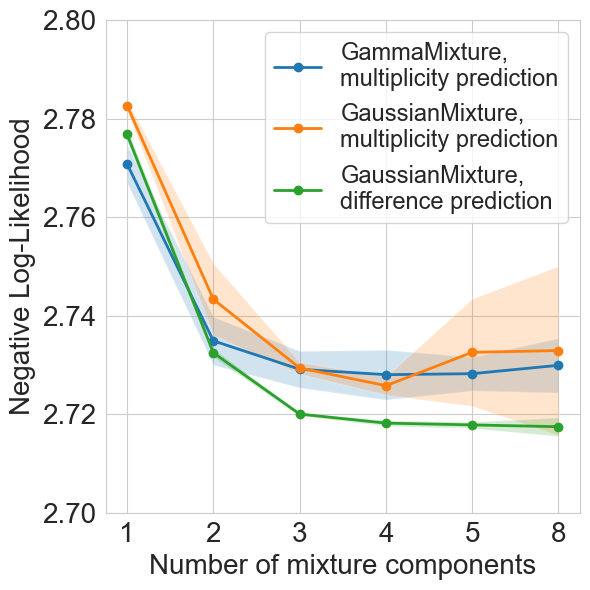

In [166]:
plot_loss_comparison(df)
plt.savefig('plots/loss_dist.pdf')

In [167]:
results2 = [
    {'blocks': 1, 'channels': 16, 'run': 1, 'loss': 2.7491},
    {'blocks': 1, 'channels': 16, 'run': 2, 'loss': 2.7475},
    {'blocks': 1, 'channels': 16, 'run': 3, 'loss': 2.7417},
    {'blocks': 1, 'channels': 32, 'run': 1, 'loss': 2.7350},
    {'blocks': 1, 'channels': 32, 'run': 2, 'loss': 2.7323},
    {'blocks': 1, 'channels': 32, 'run': 3, 'loss': 2.7380},
    {'blocks': 1, 'channels': 64, 'run': 1, 'loss': 2.7276},
    {'blocks': 1, 'channels': 64, 'run': 2, 'loss': 2.7285},
    {'blocks': 1, 'channels': 64, 'run': 3, 'loss': 2.7275},
    {'blocks': 1, 'channels': 128, 'run': 1, 'loss': 2.7279},
    {'blocks': 1, 'channels': 128, 'run': 2, 'loss': 2.7292},
    {'blocks': 1, 'channels': 128, 'run': 3, 'loss': 2.7297},
    {'blocks': 2, 'channels': 16, 'run': 1, 'loss': 2.7295},
    {'blocks': 2, 'channels': 16, 'run': 2, 'loss': 2.7260},
    {'blocks': 2, 'channels': 16, 'run': 3, 'loss': 2.7274},
    {'blocks': 2, 'channels': 32, 'run': 1, 'loss': 2.7206},
    {'blocks': 2, 'channels': 32, 'run': 2, 'loss': 2.7184},
    {'blocks': 2, 'channels': 32, 'run': 3, 'loss': 2.7190},
    {'blocks': 2, 'channels': 64, 'run': 1, 'loss': 2.7172},
    {'blocks': 2, 'channels': 64, 'run': 2, 'loss': 2.7177},
    {'blocks': 2, 'channels': 64, 'run': 3, 'loss': 2.7182},
    {'blocks': 2, 'channels': 128, 'run': 1, 'loss': 2.7224},
    {'blocks': 2, 'channels': 128, 'run': 2, 'loss': 2.7175},
    {'blocks': 2, 'channels': 128, 'run': 3, 'loss': 2.7187},
    {'blocks': 4, 'channels': 16, 'run': 1, 'loss': 2.7197},
    {'blocks': 4, 'channels': 16, 'run': 2, 'loss': 2.7187},
    {'blocks': 4, 'channels': 16, 'run': 3, 'loss': 2.7193},
    {'blocks': 4, 'channels': 32, 'run': 1, 'loss': 2.7163},
    {'blocks': 4, 'channels': 32, 'run': 2, 'loss': 2.7156},
    {'blocks': 4, 'channels': 32, 'run': 3, 'loss': 2.7155},
    {'blocks': 4, 'channels': 64, 'run': 1, 'loss': 2.7181},
    {'blocks': 4, 'channels': 64, 'run': 2, 'loss': 2.7154},
    {'blocks': 4, 'channels': 64, 'run': 3, 'loss': 2.7142},
    {'blocks': 4, 'channels': 128, 'run': 1, 'loss': 2.7167},
    {'blocks': 4, 'channels': 128, 'run': 2, 'loss': 2.7145},
    {'blocks': 4, 'channels': 128, 'run': 3, 'loss': 2.7149},
]

In [168]:
df2 = pd.DataFrame(results2)

In [169]:
df2.keys()

Index(['blocks', 'channels', 'run', 'loss'], dtype='object')

In [170]:
def plot_loss_comparison2(df):
    # Aggregate results over runs
    agg_df = df.groupby(['blocks', 'channels'])[
        'loss'
    ].agg(['mean', 'std']).reset_index()

    # Create config label for legend
    agg_df['config'] = agg_df.apply(
        lambda x: f"{int(x['blocks'])} blocks", 
        axis=1
    )
    # Set up the plot style
    plt.figure(figsize=(6, 6))
    sns.set_style("whitegrid")
    
    # Plot each configuration
    for config in agg_df['config'].unique():
        mask = agg_df['config'] == config
        config_data = agg_df[mask]

        x_positions = range(len(config_data['channels'].unique()))
        
        plt.plot(
            x_positions,
            config_data['mean'],
            'o-',
            markersize=6,
            linewidth=2,
            label=config
        )
        
        plt.fill_between(
            x_positions,
            config_data['mean'] - config_data['std'],
            config_data['mean'] + config_data['std'],
            alpha=0.2
        )
    
    # Customize the plot
    plt.xlabel('Number of channels', fontsize=FONTSIZE)
    unique_components = sorted(agg_df['channels'].unique())
    plt.xticks(range(len(unique_components)), unique_components, fontsize=FONTSIZE_TICK)
    plt.yticks(fontsize=FONTSIZE_TICK)
    plt.ylabel('Negative Log-Likelihood', fontsize=FONTSIZE)
    #plt.title('Transformer Loss vs Number of channels', fontsize=12)
    
    # Set y-axis limits
    plt.ylim(2.7, 2.8)
    
    # Add legend
    plt.legend(loc='best',fontsize=FONTSIZE_LEGEND)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return plt

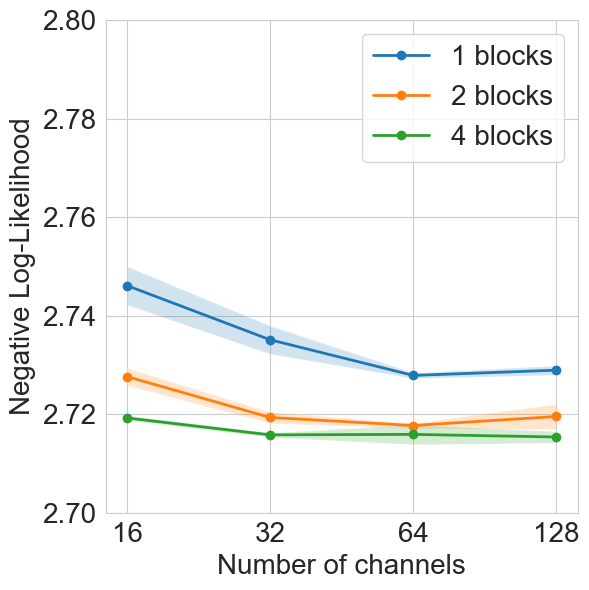

In [171]:
plot_loss_comparison2(df2)
plt.savefig('plots/loss_size.pdf')

In [250]:
results3 = [
    {'model': 'Transformer', 'dist': '1 Gamma', 'diff': False, 'run':1, "loss": 2.7689},
    {'model': 'Transformer', 'dist': '1 Gamma', 'diff': False, "run": 2, "loss": 2.7682},
    {'model': 'Transformer', 'dist': '1 Gamma', 'diff': False, "run": 3, "loss": 2.7752},
    {'model': 'Transformer', 'dist': '3 Gamma', 'diff': False, "run": 1, "loss": 2.7256},
    {'model': 'Transformer', 'dist': '3 Gamma', 'diff': False, "run": 2, "loss": 2.7330},
    {'model': 'Transformer', 'dist': '3 Gamma', 'diff': False, "run": 3, "loss": 2.7287},
    {'model': 'Transformer', 'dist': '5 Gamma', 'diff': False, 'run':1, 'loss': 2.7275},
    {'model': 'Transformer', 'dist': '5 Gamma', 'diff': False, 'run':2, 'loss': 2.7252},
    {'model': 'Transformer', 'dist': '5 Gamma', 'diff': False, 'run':3, 'loss': 2.7319},
    {'model': 'Transformer', 'dist': '5 Gaussian', 'diff': True, 'run':1, 'loss': 2.7171},
    {'model': 'Transformer', 'dist': '5 Gaussian', 'diff': True, 'run':2, 'loss': 2.7180},
    {'model': 'Transformer', 'dist': '5 Gaussian', 'diff': True, 'run':3, 'loss': 2.7183},
    {'model': 'Transformer', 'dist': '5 Gaussian', 'diff': False, 'run':1, "loss": 2.7266},
    {'model': 'Transformer', 'dist': '5 Gaussian', 'diff': False, 'run':1, "loss": 2.7259},
    {'model': 'Transformer', 'dist': '5 Gaussian', 'diff': False, 'run':1, "loss": 2.7451},
    {'model': 'Transformer', 'dist': 'Categorical', 'diff': True, 'run':1, 'loss': 2.7245},
    {'model': 'Transformer', 'dist': 'Categorical', 'diff': True, 'run':2, 'loss': 2.7241},
    {'model': 'Transformer', 'dist': 'Categorical', 'diff': True, 'run':3, 'loss': 2.7206},
    {'model': 'GATr', 'dist': '5 Gamma', 'diff': False, 'run':1, 'loss': 2.7193},
    {'model': 'GATr', 'dist': '5 Gamma', 'diff': False, 'run':2, 'loss': 2.7180},
    {'model': 'GATr', 'dist': '5 Gamma', 'diff': False, 'run':3, 'loss': 2.7193},
    {'model': 'GATr', 'dist': '5 Gaussian', 'diff': True, 'run':1, 'loss': 2.7169},
    {'model': 'GATr', 'dist': '5 Gaussian', 'diff': True, 'run':2, 'loss': 2.7165},
    {'model': 'GATr', 'dist': '5 Gaussian', 'diff': True, 'run':3, 'loss': 2.7165},
    {'model': 'GATr', 'dist': 'Categorical', 'diff': True, 'run':1, 'loss': 2.7263},
    {'model': 'GATr', 'dist': 'Categorical', 'diff': True, 'run':2, 'loss': 2.7218},
    {'model': 'GATr', 'dist': 'Categorical', 'diff': True, 'run':3, 'loss': 2.7248},
]

In [251]:
df3 = pd.DataFrame(results3)

In [260]:
def plot_loss_comparison3(df, FONTSIZE=12):
    agg_df = df.groupby(['model', 'dist', 'diff'])['loss'].agg(['mean', 'std']).reset_index()
    agg_df['cfg'] = agg_df.apply(lambda x: f"{x['model']}\n {x['dist']}", axis=1)
    agg_df['config'] = agg_df.apply(lambda x : x['cfg'] + f'\n {"Difference"}' if x['diff'] else x['cfg'], axis=1)
    agg_df = agg_df.sort_values(by='mean', ascending=False)
    plt.figure(figsize=(8, 8))
    sns.set_style("whitegrid")

    x_positions = np.arange(len(agg_df))
    plt.plot(
        x_positions,
        agg_df['mean'],
        'o-',
        markersize=6,
        linewidth=2,
    )

    plt.errorbar(
        x_positions,
        agg_df['mean'],
        yerr=agg_df['std'],
        fmt='o-',
        markersize=6,
        linewidth=2,
        capsize=5
    )

    plt.xticks(x_positions, agg_df['config'], rotation=45, ha='right', fontsize=FONTSIZE)
    plt.ylabel('Negative Log-Likelihood', fontsize=FONTSIZE)
    plt.ylim(2.71,2.78)
    plt.yticks(fontsize=FONTSIZE)
    plt.show()

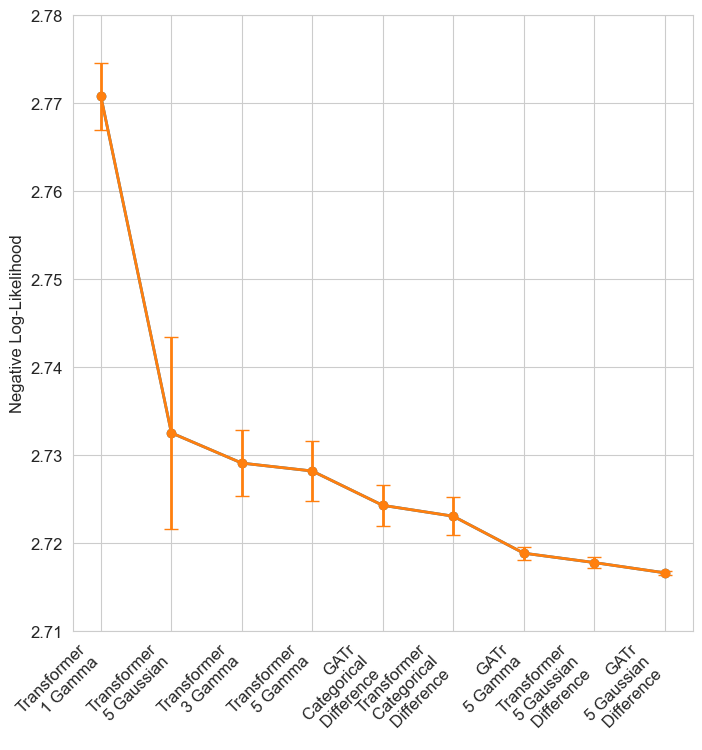

In [261]:
plot_loss_comparison3(df3)
plt.show()